# Set Working directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/project') # main working directory

In [ ]:
train_dir='segmented/' # path of the training set

In [ ]:
model_name='best_model.h5'

# importing libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from keras.callbacks import ModelCheckpoint
import numpy as np
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import matplotlib.pyplot as plt

# Function to build model, trining model, plot training and test model

In [ ]:
def model_build():
  model=Sequential()
  model.add(tf.keras.Input(shape=(64,64,)))
  model.add(Flatten())
  model.add(Dense(256,activation='relu'))
  model.add(Dense(256,activation='relu'))
  model.add(Dense(256,activation='relu'))
  model.add(Dense(256,activation='relu'))
  model.add(Dense(256,activation='relu'))
  model.add(Dense(256,activation='relu'))
  model.add(Dense(256,activation='relu'))
  model.add(Dense(256,activation='relu'))
  model.add(Dense(256,activation='relu'))
  model.add(Dense(45,activation='softmax'))
  model.compile(optimizer=Adam(learning_rate=0.001, decay=1e-6), 
                loss='binary_crossentropy', 
                metrics=['accuracy'])
  return model

def model_fit(model,model_path):
  callbacks=[
             ModelCheckpoint(filepath=model_path,
                              save_best_only=True,
                              verbose=1,
                              mode='min',
                              moniter='val_loss')
             ]
  history=model.fit(train_set,
                    validation_data=val_set,
                    epochs = 300,
                    verbose = 1,
                    callbacks=callbacks)
  return history
  
def plot_training(history):
  plt.figure(figsize=(14,5))
  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['train', 'test'], loc='upper left')

  plt.subplot(1,2,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

def test_model(model,test_set):
  y_pred = model.predict(test_set)
  y_pred = np.argmax(y_pred, axis=1)
  print('Model classification accurcy:',np.round(accuracy_score(test_set.classes,y_pred),2))
  class_labels = test_set.class_indices
  class_labels = {v:k for k,v in class_labels.items()}
  print('Classification Report')
  target_names = list(class_labels.values())
  print(classification_report(test_set.classes, y_pred, target_names=target_names))



# Set directories and shape of input image

In [ ]:
# test_dir='output/val/' # path of the testing set
target_size=(64,64)

# Visualize Dataset

In [ ]:
plt.figure(figsize=(50,50))
for i, clas in enumerate(os.listdir(train_dir)):
    plt.subplot(1,len(os.listdir(train_dir)),i+1)
    class_dir=train_dir+clas
    total_pic=len(os.listdir(class_dir))
    pic_num=np.random.randint(total_pic)
    img = load_img((train_dir + clas +'/'+ os.listdir(train_dir + clas)[pic_num]))
    plt.imshow(img)
    plt.title(clas)
    plt.axis('off')
plt.show()

# Build Dataset into keras environment

In [ ]:
datagen = ImageDataGenerator(validation_split=0.1)

train_set = datagen.flow_from_directory(train_dir,
                                          batch_size=128,
                                          target_size=target_size,
                                          color_mode='grayscale',
                                          class_mode='categorical',
                                          subset='training',
                                          shuffle=False)

val_set = datagen.flow_from_directory(train_dir,
                                      batch_size=128,
                                      target_size=target_size,
                                      color_mode='grayscale',
                                      class_mode='categorical',
                                      subset='validation',
                                      shuffle=False)

# datagen = ImageDataGenerator()

# test_set = datagen.flow_from_directory(test_dir,
#                                       batch_size=64,
#                                       target_size=target_size,
#                                       color_mode='grayscale',
#                                       class_mode='categorical',
#                                        shuffle=False)

Found 415 images belonging to 45 classes.
Found 45 images belonging to 45 classes.


In [ ]:
train_set.class_indices

#Resnet 50

In [ ]:
model = model_build()
model.build(input_shape=(32,32,))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 256)               1048832   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 256)               6

In [ ]:
history=model_fit(model,model_name)

Epoch 1/300
4/4 [==============================] - ETA: 0s - loss: 1.5559 - accuracy: 0.0096 WARNING:tensorflow:Model was constructed with shape (None, 64, 64) for input KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'"), but it was called on an input with incompatible shape (None, None, None, None).

Epoch 1: val_loss improved from inf to 0.52109, saving model to best_model.h5
4/4 [==============================] - 88s 28s/step - loss: 1.5559 - accuracy: 0.0096 - val_loss: 0.5211 - val_accuracy: 0.0222
Epoch 2/300
3/4 [=====================>........] - ETA: 0s - loss: 0.4326 - accuracy: 0.0286
Epoch 2: val_loss improved from 0.52109 to 0.36331, saving model to best_model.h5
4/4 [==============================] - 1s 164ms/step - loss: 0.4403 - accuracy: 0.0265 - val_loss: 0.3633 - val_accuracy: 0.0222
Epoch 3/300
4/4 [==============================] - ETA: 0s - loss: 0.3691 - accuracy: 0.01

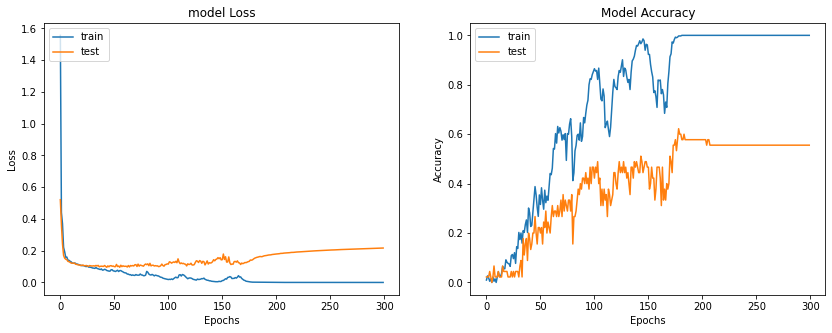

In [ ]:
plot_training(history)

In [ ]:
test_model(model,val_set)

Model classification accurcy: 0.56
Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.50      1.00      0.67         1
          18       0.00      0.00      0.00         1
          19       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
          20       1.00      1.00      1.00         1
          21       0.00      0.00      0.00         1
          22       1.00      1.00      1.00         1
          23       0.00      0.00      0.00         1
          24       1.00 